In [1]:
# https://dev.to/1n0t/matplotlib-heatmap-calendar-3kbo

In [2]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from  matplotlib.colors import LinearSegmentedColormap

import yfinance as yf

from datetime import date
from datetime import datetime

import os

In [3]:
folderPath_rsrc = '/Resources/'
folderPath_results = '/Results/'
cwd = os.getcwd()
path_rsrc = cwd + folderPath_rsrc
path_results = cwd + folderPath_results
# read data
ETFs = pd.read_excel(path_rsrc + "ETFs list.xlsx")

In [4]:
ETFs

,Technology,Energy,Telecom,Consumer Discretionary,Real Estate,Industrials,Utilities,Materials,Healthcare,Consumer Staples,Financials
0,AAPB,ACES,FCOM,AMZD,BBRE,AIRR,BLLD,ALUM,AGNG,CHIS,BDCX
1,AAPD,AMJ,IXP,AMZU,BLDG,AQWA,CHIU,BATT,ARKG,CLIX,BDCZ
2,AAPU,AMLP,IYZ,BAD,BYRE,ARKX,ECLN,CHIM,BBC,EATV,BIZD
3,AIQ,AMNA,LTL,BEDZ,CHIR,AWAY,EMIF,CIRC,BBH,EATZ,BNKD
4,ARKK,AMND,NXTG,BETZ,DFGR,BDRY,FUTY,COPX,BBP,ECON,BNKU
...,...,...,...,...,...,...,...,...,...,...,...
163,XPND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
164,XSD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
165,XSW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
166,XT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
ETFs['Technology'].values

array(['AAPB', 'AAPD', 'AAPU', 'AIQ', 'ARKK', 'ARKW', 'ARMR', 'ARVR',
       'BABX', 'BCDF', 'BERZ', 'BITQ', 'BITW', 'BKCH', 'BLCN', 'BLKC',
       'BLOK', 'BNGE', 'BPAY', 'BTEK', 'BUG', 'BULD', 'BULZ', 'BUZZ',
       'BWEB', 'BYTE', 'CHIK', 'CIBR', 'CLDL', 'CLOU', 'CONL', 'CQQQ',
       'CRPT', 'CWEB', 'DAPP', 'DAT', 'DGIN', 'DRUP', 'DTEC', 'EMFQ',
       'EMQQ', 'EWEB', 'FBL', 'FCLD', 'FDIG', 'FDN', 'FFND', 'FIVG',
       'FMET', 'FMQQ', 'FNGD', 'FNGG', 'FNGO', 'FNGU', 'FTEC', 'FTXL',
       'FXL', 'GAMR', 'GAST', 'GFOF', 'GINN', 'HACK', 'IBLC', 'IBOT',
       'IDAT', 'IETC', 'IEUS', 'IGM', 'IGN', 'IGPT', 'IGV', 'IHAK',
       'INQQ', 'IPAY', 'IQM', 'IRBO', 'ISRA', 'ITEQ', 'IVES', 'IWFH',
       'IXN', 'IYW', 'IZRL', 'JFWD', 'KEMQ', 'KFVG', 'KLIP', 'KNCT',
       'KOIN', 'KSTR', 'KTEC', 'KWEB', 'LEGR', 'LOUP', 'LRNZ', 'MEME',
       'METV', 'MINV', 'MOON', 'MRAD', 'MSFD', 'MSFU', 'NBDS', 'NVDL',
       'NVDS', 'OGIG', 'PNQI', 'PRNT', 'PSCT', 'PSI', 'PTF', 'QQH', 'QQQ',
       'QTEC',

In [33]:
sector = ETFs.columns[0]
energy = ETFs[sector]
energy.dropna(inplace=True)

In [6]:
energy = energy.to_list()

In [7]:
energy[:10]

['AAPB', 'AAPD', 'AAPU', 'AIQ', 'ARKK', 'ARKW', 'ARMR', 'ARVR', 'BABX', 'BCDF']

In [8]:
end_ = date.today()  # yyyy-mm-dd
if end_.day == 31:
    start_ = datetime(end_.year, end_.month - 1, 30)
else:
    start_ = datetime(end_.year, end_.month - 1, end_.day)

data = yf.download(energy, start=start_, end=end_, interval="1wk")

[*********************100%%**********************]  168 of 168 completed


In [9]:
date.today()

datetime.date(2023, 11, 20)

In [10]:
start_ 

datetime.datetime(2023, 10, 20, 0, 0)

In [11]:
data

Adj Close                                                         \
                 AAPB       AAPD       AAPU        AIQ       ARKK       ARKW   
Date                                                                           
2023-10-16  23.100000  22.540001  23.809999  26.280001  36.029999  51.970001   
2023-10-23  21.980000  23.190001  22.840000  25.670000  34.099998  50.040001   
2023-10-30  23.860001  22.080000  24.490000  27.610001  40.439999  58.119999   
2023-11-06  26.150000  20.920000  26.559999  28.250000  39.730000  58.900002   
2023-11-13  26.969999  20.590000  27.270000  29.250000  43.700001  62.270000   

                                                        ... Volume        \
                 ARMR       ARVR       BABX       BCDF  ...   WUGI  XDAT   
Date                                                    ...                
2023-10-16  19.389000  28.809999  16.959999  20.768000  ...   1100   200   
2023-10-23  18.422001  28.261000  18.010000  20.698000  ...   8500  3100   
2023-10-30  19.110001  30.624001  18.920000  21.575001  ...   3400  1100   
2023-11-06  19.250000  31.469999  17.889999  21.739000  ...  13600  5100   
2023-11-13  19.825001  32.518002  15.850000  22.221001  ...   8000  2700   

                                                                         
             XITK       XLK   XNTK   XPND     XSD    XSW      XT   XWEB  
Date                                                                     
2023-10-16   1100   7667700   8400   2400   80000   9500   89000    200  
2023-10-23   7500  39373500  34900  27900  347100  66900  489000   3500  
2023-10-30  10800  38936600  71100   1000  327300  54500  490700   5700  
2023-11-06  13700  31286200  59300   8400  225700  83600  677200  16800  
2023-11-13  12900  33106300  84800  32600  251300  79500  594500   6700  

[5 rows x 1008 columns]

In [12]:
if end_.day == 31:
    start_ = datetime(end_.year, end_.month - 1, 30)

In [13]:
df = data.Close
df

,AAPB,AAPD,AAPU,AIQ,ARKK,ARKW,ARMR,ARVR,BABX,BCDF,...,WUGI,XDAT,XITK,XLK,XNTK,XPND,XSD,XSW,XT,XWEB
Date,,,,,,,,,,,,,,,,,,,,,
2023-10-16,23.100000,22.540001,23.809999,26.280001,36.029999,51.970001,19.389000,28.809999,16.959999,20.768000,...,42.945999,17.752001,115.776001,163.940002,133.710007,20.410000,178.979996,120.790001,49.709999,69.672997
2023-10-23,21.980000,23.190001,22.840000,25.670000,34.099998,50.040001,18.422001,28.261000,18.010000,20.698000,...,42.036999,17.228001,110.949997,161.119995,130.729996,19.660000,171.229996,117.570000,48.209999,66.066002
2023-10-30,23.860001,22.080000,24.490000,27.610001,40.439999,58.119999,19.110001,30.624001,18.920000,21.575001,...,44.998001,18.313000,121.498001,171.759995,141.070007,21.006001,181.889999,125.949997,51.660000,72.445000
2023-11-06,26.150000,20.920000,26.559999,28.250000,39.730000,58.900002,19.250000,31.469999,17.889999,21.739000,...,46.860001,19.014000,123.260002,179.520004,146.649994,21.730000,185.100006,127.540001,51.900002,72.886002
2023-11-13,26.969999,20.590000,27.270000,29.250000,43.700001,62.270000,19.825001,32.518002,15.850000,22.221001,...,47.978001,19.709000,129.401001,182.800003,150.979996,22.110001,198.009995,132.669998,54.180000,77.403999


---
## Calcular retornos

In [14]:
returns = df.pct_change()
returns

,AAPB,AAPD,AAPU,AIQ,ARKK,ARKW,ARMR,ARVR,BABX,BCDF,...,WUGI,XDAT,XITK,XLK,XNTK,XPND,XSD,XSW,XT,XWEB
Date,,,,,,,,,,,,,,,,,,,,,
2023-10-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-10-23,-0.048485,0.028838,-0.040739,-0.023212,-0.053566,-0.037137,-0.049874,-0.019056,0.061910,-0.003371,...,-0.021166,-0.029518,-0.041684,-0.017201,-0.022287,-0.036747,-0.043301,-0.026658,-0.030175,-0.051770
2023-10-30,0.085532,-0.047865,0.072242,0.075575,0.185924,0.161471,0.037347,0.083613,0.050527,0.042371,...,0.070438,0.062979,0.095070,0.066038,0.079094,0.068464,0.062255,0.071277,0.071562,0.096555
2023-11-06,0.095976,-0.052536,0.084524,0.023180,-0.017557,0.013421,0.007326,0.027625,-0.054440,0.007601,...,0.041380,0.038279,0.014502,0.045179,0.039555,0.034466,0.017648,0.012624,0.004646,0.006087
2023-11-13,0.031358,-0.015774,0.026732,0.035398,0.099925,0.057216,0.029870,0.033302,-0.114030,0.022172,...,0.023858,0.036552,0.049822,0.018271,0.029526,0.017487,0.069746,0.040223,0.043931,0.061987


In [15]:
def currentRow(df):
    """
    Choice the last row the present. Besides Takes the max and min values
    of this row.
    Parameters
    ----------
    df: pandas DataFrame
        Dataframea containing returns data.
        
    Returns
    -------
    last_row: pandas Series
        Last returns.
    val_max: int
        Maximum value in last_row.
    val_min: int
        Minimum value in last_row.
    """
    # sort last row values
    last_row = df.iloc[-1].sort_values(ascending=False)
    # max and min values
    val_max = last_row .max()
    val_min = last_row .min()
    
    return last_row, val_max, val_min

In [16]:
last_row, val_max, val_min = currentRow(returns)

In [17]:
last_row

TARK    0.203039
SOXL    0.122815
UBOT    0.105463
JFWD    0.103956
ARKK    0.099925
          ...   
WEBS   -0.091920
SARK   -0.094199
BERZ   -0.095588
BABX   -0.114030
SOXS   -0.121721
Name: 2023-11-13 00:00:00, Length: 168, dtype: float64

In [18]:
val_max, val_min

(0.20303918655176023, -0.12172086882634714)

---
## Selection
we need to take the 10 best and 10 worst tickers for sector

In [37]:
def selection(serie, n=10, m_round=2):
    """
    if n>= len(serie) an n*2 serie lenght is return. Otherwise the same
    series is return.
    
    Parameters
    ----------
    serie: pandas Series
        Returns.
    n: int
        Amount of best and worst datra selected (each one).
        Default 10.
    m_round_: int
          Digits to Round.
    
    Returns
    -------
    selected: pandas Series
        Series containing best and worst returns.
    """
 
    if len(serie) >= n :         # how many values to select
        best = serie.iloc[:n]
        worst = serie.iloc[-n:]
        selected = pd.concat([best, worst], axis=0)
        selected = (selected * 100).round(m_round)       # porcentual change
    else:
        selected = serie
        selected = (selected * 100).round(m_round)       # porcentual change
        
    return selected

In [20]:
selection_ = selection(last_row)

In [21]:
selection_

TARK    20.30
SOXL    12.28
UBOT    10.55
JFWD    10.40
ARKK     9.99
BULZ     9.89
CONL     9.77
WEBL     9.00
MEME     7.92
XSD      6.97
WGMI    -2.72
REW     -3.82
TECS    -5.46
SSG     -6.19
FNGD    -6.78
WEBS    -9.19
SARK    -9.42
BERZ    -9.56
BABX   -11.40
SOXS   -12.17
Name: 2023-11-13 00:00:00, dtype: float64

---
## Heatmap Returns Plot

In [22]:
def matrix_to_plot(serie):
    """
    Parameters
    ----------
    serie: pandas Series
        Series containing best and worst returns.
        
    Returns
    -------
    new_names: numpy.ndarray
        Names to plot.
    new_array: numpy.ndarray
        Values to plot.
    """
    length = len(serie)
    # the idea is to shape an a X b matrix
    a = int(np.sqrt(length))
    b = int(np.ceil(length/a))
    m_length = a * b                # matrix "length"

    if m_length >= length:
        # compute how many elements need to be add to the array
        diff = abs(length - m_length)
        
        # creatre a diff lenght array 
        add =np.full(diff, np.nan)
        new_array = np.append(serie, add)
        new_array = new_array.reshape(a, b)

        # add names to the plot
        names = serie.index.to_list()
        add_names =np.full(diff, '---')
        new_names = np.append(names, add_names)
        new_names = new_names.reshape(a, b)
        
    return new_names, new_array

In [23]:
new_names, new_array = matrix_to_plot(selection_)

In [24]:
new_names

array([['TARK', 'SOXL', 'UBOT', 'JFWD', 'ARKK'],
       ['BULZ', 'CONL', 'WEBL', 'MEME', 'XSD'],
       ['WGMI', 'REW', 'TECS', 'SSG', 'FNGD'],
       ['WEBS', 'SARK', 'BERZ', 'BABX', 'SOXS']], dtype='<U4')

In [25]:
new_array

array([[ 20.3 ,  12.28,  10.55,  10.4 ,   9.99],
       [  9.89,   9.77,   9.  ,   7.92,   6.97],
       [ -2.72,  -3.82,  -5.46,  -6.19,  -6.78],
       [ -9.19,  -9.42,  -9.56, -11.4 , -12.17]])

In [26]:
# valores = new_array
# from  matplotlib.colors import LinearSegmentedColormap
# cmap_=LinearSegmentedColormap.from_list('rg',["r", "w", "g"], N=256) 

# # "RdYlGn"
# fig, ax = plt.subplots()

# # Especificamos paleta de colores a usar y rango de valores a representar.
# ax.imshow(valores, cmap=cmap_, vmin=val_min*100, vmax=val_max*100)
# # borrar axis labels
# ax.set_yticklabels([])
# ax.set_xticklabels([])

# # Reducimos la longitud de las marcas a 0 para que no sean visibles
# ax.tick_params(axis=u'both', which=u'both', length=0)
# for lado in ['left', 'right', 'bottom', 'top']:
#     ax.spines[lado].set_visible(False)

# # # Indicamos las posiciones donde dibujaremos la rejilla  
# xmin, xmax = ax.get_xlim()
# ymin, ymax = ax.get_ylim()

# ax.set_xticks(np.arange(xmin, xmax+1), minor=True)
# ax.set_yticks(np.arange(ymax, ymin+1), minor=True)

# # Dibujamos la rejilla de color blanco para que actue como separador.
# ax.grid(which='minor', color='w', linestyle='-', linewidth=2)
# # ax.tick_params(which="minor", bottom=False, left=False)

# for i in range(new_array.shape[0]):
#     for j in range(new_array.shape[1]):
#         # print(i, j, valores[i,j])
#         text = ax.text(j, i, str(new_names[i, j]) + '\n' + str(valores[i, j])+'%',
#                        ha="center", va="center", color="k", size=6)

# ax.set_title(f"{sector}\n")
        
# plt.savefig(f"{sector}.png")
# plt.show()



In [27]:
def heatmap(values, labels, max_, min_, sector):
    """
    Create a heatmap from a numpy array and two lists of labels
    
    Parameters
    ----------
    values: numpy.ndarray
        Values to plot.
    labels: numpy.ndarray
        Names to plot.
    max_: int
        Max return value.
    min_: int
        Min return value.
    sector: string
        Sector name.
    
    """
    cmap_=LinearSegmentedColormap.from_list('rg',["r", "w", "g"], N=256) 

    # "RdYlGn"
    fig, ax = plt.subplots()

    # Especificamos paleta de colores a usar y rango de valores a representar.
    ax.imshow(values, cmap=cmap_, vmin=min_*100, vmax=max_*100)
    # borrar axis labels
    ax.set_yticklabels([])
    ax.set_xticklabels([])

    # Reducimos la longitud de las marcas a 0 para que no sean visibles
    ax.tick_params(axis=u'both', which=u'both', length=0)
    for lado in ['left', 'right', 'bottom', 'top']:
        ax.spines[lado].set_visible(False)

    # # Indicamos las posiciones donde dibujaremos la rejilla  
    xmin, xmax = ax.get_xlim()
    ymin, ymax = ax.get_ylim()

    ax.set_xticks(np.arange(xmin, xmax+1), minor=True)
    ax.set_yticks(np.arange(ymax, ymin+1), minor=True)

    # Dibujamos la rejilla de color blanco para que actue como separador.
    ax.grid(which='minor', color='w', linestyle='-', linewidth=2)
    # ax.tick_params(which="minor", bottom=False, left=False)

    for i in range(values.shape[0]):
        for j in range(values.shape[1]):
            # print(i, j, values[i,j])
            text = ax.text(j, i, str(labels[i, j]) + '\n' + str(values[i, j])+'%',
                           ha="center", va="center", color="k", size=6)

    ax.set_title(f"{sector}\n")

    plt.savefig(f"{sector}.png")
    plt.show()

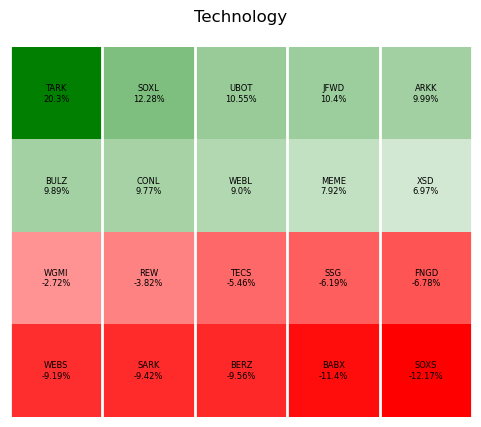

In [28]:
heatmap(values=new_array, labels=new_names, max_=val_max, min_=val_min, sector=sector)